# Plots for paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [15]:

import matplotlib.pyplot as plt 
from priors import priors_dict
import numpy as np 
import json
import pandas as pd 
import corner
import scienceplots

def load_data(path,variables_to_plot):

    print("Loading data from file:", path)
    # Opening JSON file
    f = open(path)
    
    # returns JSON object as 
    # a dictionary
    data = json.load(f)


    #Make it a dataframe. Nice for surfacing
    df = pd.DataFrame(data["samples"]["content"]) # posterior


    #Make it a dataframe. Nice for surfacing
    df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior

    return df_posterior.median()




def median_distribution(list_of_files,variables_to_plot):
    y = []
    fig= None 
    for f in list_of_files:
        yi = load_data(f,variables_to_plot)
        y.extend([yi])



    df=pd.concat(y)


    df['omega_gw'].hist()


            


In [16]:
import glob 
list_of_files = sorted(glob.glob("../data/nested_sampling/batch_*_result.json"))
list_of_files

['../data/nested_sampling/batch_1235_result.json',
 '../data/nested_sampling/batch_1237_result.json',
 '../data/nested_sampling/batch_1238_result.json',
 '../data/nested_sampling/batch_1239_result.json',
 '../data/nested_sampling/batch_1240_result.json',
 '../data/nested_sampling/batch_1241_result.json']

Loading data from file: ../data/nested_sampling/batch_1235_result.json
Loading data from file: ../data/nested_sampling/batch_1237_result.json
Loading data from file: ../data/nested_sampling/batch_1238_result.json
Loading data from file: ../data/nested_sampling/batch_1239_result.json
Loading data from file: ../data/nested_sampling/batch_1240_result.json
Loading data from file: ../data/nested_sampling/batch_1241_result.json


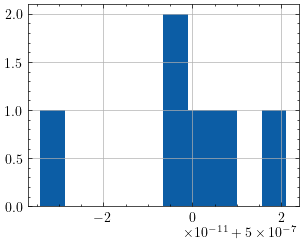

In [17]:
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
median_distribution(list_of_files,variables_to_plot)